<a href="https://colab.research.google.com/github/MaiHamed/mushroom-classification/blob/main/Copy_of_Task1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from google.colab import files
uploaded = files.upload()


Saving mushrooms 2.csv to mushrooms 2.csv


In [2]:
# Import dataset using pandas
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import MinMaxScaler

na_values = '?'
data = pd.read_csv('mushrooms.csv', na_values='?')

pd.set_option('display.max_rows', None)
pd.set_option('display.max_columns', None)
print("Full Dataset:\n")
print(data)


Streaming output truncated to the last 5000 lines.
3124                 k          s       d  
3125                 n          y       d  
3126                 k          y       d  
3127                 n          v       d  
3128                 n          v       d  
3129                 n          y       d  
3130                 k          v       d  
3131                 n          y       d  
3132                 k          y       d  
3133                 n          v       d  
3134                 k          y       d  
3135                 k          y       d  
3136                 k          v       d  
3137                 n          v       d  
3138                 h          v       p  
3139                 n          y       d  
3140                 k          v       d  
3141                 h          y       d  
3142                 k          y       d  
3143                 k          y       d  
3144                 n          y       d  
3145                 n   

In [3]:
# No. of rows & coloumns
print("\nShape of Dataset:", data.shape)

# Coloumn name
print("\nColumn Names:\n", data.columns.tolist())

# Type of data in each coloumn
print("\nData Types:\n", data.dtypes)



Shape of Dataset: (8124, 23)

Column Names:
 ['class', 'cap-shape', 'cap-surface', 'cap-color', 'bruises', 'odor', 'gill-attachment', 'gill-spacing', 'gill-size', 'gill-color', 'stalk-shape', 'stalk-root', 'stalk-surface-above-ring', 'stalk-surface-below-ring', 'stalk-color-above-ring', 'stalk-color-below-ring', 'veil-type', 'veil-color', 'ring-number', 'ring-type', 'spore-print-color', 'population', 'habitat']

Data Types:
 class                       object
cap-shape                   object
cap-surface                 object
cap-color                   object
bruises                     object
odor                        object
gill-attachment             object
gill-spacing                object
gill-size                   object
gill-color                  object
stalk-shape                 object
stalk-root                  object
stalk-surface-above-ring    object
stalk-surface-below-ring    object
stalk-color-above-ring      object
stalk-color-below-ring      object
veil-type 

In [4]:
# No. of duplicate rows
duplicates = data.duplicated().sum()
print("\nNumber of duplicate rows:", duplicates)

# Missing values per column
missing = data.isnull().sum()
print("\nMissing values per column:\n", missing)



Number of duplicate rows: 0

Missing values per column:
 class                          0
cap-shape                      0
cap-surface                    0
cap-color                      0
bruises                        0
odor                           0
gill-attachment                0
gill-spacing                   0
gill-size                      0
gill-color                     0
stalk-shape                    0
stalk-root                  2480
stalk-surface-above-ring       0
stalk-surface-below-ring       0
stalk-color-above-ring         0
stalk-color-below-ring         0
veil-type                      0
veil-color                     0
ring-number                    0
ring-type                      0
spore-print-color              0
population                     0
habitat                        0
dtype: int64


In [5]:
# Unique values
for column in data.columns:
    print(f"\nUnique values in '{column}':")
    print(data[column].unique())



Unique values in 'class':
['p' 'e']

Unique values in 'cap-shape':
['x' 'b' 's' 'f' 'k' 'c']

Unique values in 'cap-surface':
['s' 'y' 'f' 'g']

Unique values in 'cap-color':
['n' 'y' 'w' 'g' 'e' 'p' 'b' 'u' 'c' 'r']

Unique values in 'bruises':
['t' 'f']

Unique values in 'odor':
['p' 'a' 'l' 'n' 'f' 'c' 'y' 's' 'm']

Unique values in 'gill-attachment':
['f' 'a']

Unique values in 'gill-spacing':
['c' 'w']

Unique values in 'gill-size':
['n' 'b']

Unique values in 'gill-color':
['k' 'n' 'g' 'p' 'w' 'h' 'u' 'e' 'b' 'r' 'y' 'o']

Unique values in 'stalk-shape':
['e' 't']

Unique values in 'stalk-root':
['e' 'c' 'b' 'r' nan]

Unique values in 'stalk-surface-above-ring':
['s' 'f' 'k' 'y']

Unique values in 'stalk-surface-below-ring':
['s' 'f' 'y' 'k']

Unique values in 'stalk-color-above-ring':
['w' 'g' 'p' 'n' 'b' 'e' 'o' 'c' 'y']

Unique values in 'stalk-color-below-ring':
['w' 'p' 'g' 'b' 'n' 'e' 'y' 'o' 'c']

Unique values in 'veil-type':
['p']

Unique values in 'veil-color':
['w' 'n

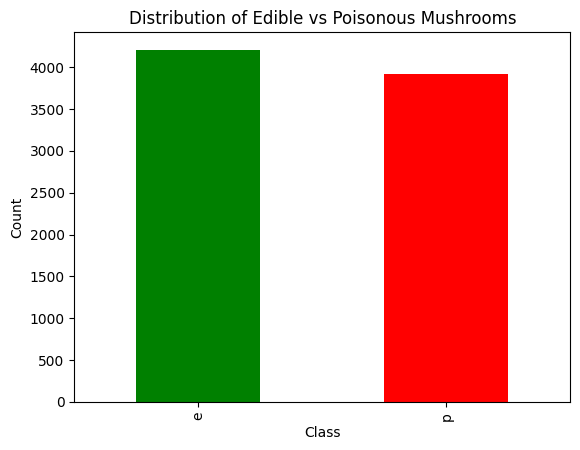

In [6]:
#Plot distribution of edible vs poisonous mushrooms

data['class'].value_counts().plot(kind='bar', color=['green', 'red'])
plt.title('Distribution of Edible vs Poisonous Mushrooms')
plt.xlabel('Class')
plt.ylabel('Count')
plt.show()

In [7]:
# summary of dataset characteristics

summary = pd.DataFrame({
    'Total Rows': [data.shape[0]],
    'Total Columns': [data.shape[1]],
    'Duplicate Rows': [duplicates],
    'Missing Values': [missing.sum()],
    'Edible Count': [data['class'].value_counts().get('e', 0)],
    'Poisonous Count': [data['class'].value_counts().get('p', 0)]
})

print("\nDataset Summary Table:\n")
print(summary)



Dataset Summary Table:

   Total Rows  Total Columns  Duplicate Rows  Missing Values  Edible Count  \
0        8124             23               0            2480          4208   

   Poisonous Count  
0             3916  


In [8]:

###### Preprocessing part ######
imp_mean = SimpleImputer(missing_values=np.nan, strategy='most_frequent')
data = pd.DataFrame(imp_mean.fit_transform(data), columns=data.columns)

print("\nData Before Label Encoding:\n")
print(data.head())



Data Before Label Encoding:

  class cap-shape cap-surface cap-color bruises odor gill-attachment  \
0     p         x           s         n       t    p               f   
1     e         x           s         y       t    a               f   
2     e         b           s         w       t    l               f   
3     p         x           y         w       t    p               f   
4     e         x           s         g       f    n               f   

  gill-spacing gill-size gill-color stalk-shape stalk-root  \
0            c         n          k           e          e   
1            c         b          k           e          c   
2            c         b          n           e          c   
3            c         n          n           e          e   
4            w         b          k           t          e   

  stalk-surface-above-ring stalk-surface-below-ring stalk-color-above-ring  \
0                        s                        s                      w   
1       

In [9]:
##### Encode Categorical Data #####
labelencoder = LabelEncoder()

for col in data.columns:
    data[col] = labelencoder.fit_transform(data[col])

print("\nData After Label Encoding:\n")
print(data.head())


Data After Label Encoding:

   class  cap-shape  cap-surface  cap-color  bruises  odor  gill-attachment  \
0      1          5            2          4        1     6                1   
1      0          5            2          9        1     0                1   
2      0          0            2          8        1     3                1   
3      1          5            3          8        1     6                1   
4      0          5            2          3        0     5                1   

   gill-spacing  gill-size  gill-color  stalk-shape  stalk-root  \
0             0          1           4            0           2   
1             0          0           4            0           1   
2             0          0           5            0           1   
3             0          1           5            0           2   
4             1          0           4            1           2   

   stalk-surface-above-ring  stalk-surface-below-ring  stalk-color-above-ring  \
0           

In [10]:
from sklearn.model_selection import train_test_split
#### splitting data
# 'class' is the target column ,'x' is for features and 'y' for labels
X = data.drop('class', axis=1)
y = data['class']

# Split into 80% training and 20% testing data
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)

print("\nTraining Set Shape:", X_train.shape)
print("Testing Set Shape:", X_test.shape)


Training Set Shape: (6499, 22)
Testing Set Shape: (1625, 22)


In [11]:
#print a sample of train and test data
print(" Sample of X_train (training features):")
print(X_train.head())

print("\n Sample of y_train (training labels):")
print(y_train.head())

print("\n Sample of X_test (testing features):")
print(X_test.head())

print("\n Sample of y_test (testing labels):")
print(y_test.head())


 Sample of X_train (training features):
      cap-shape  cap-surface  cap-color  bruises  odor  gill-attachment  \
5249          2            3          9        0     2                1   
5781          5            2          5        1     5                1   
7586          0            2          3        0     5                1   
6181          2            2          4        0     7                1   
7338          3            3          4        0     2                1   

      gill-spacing  gill-size  gill-color  stalk-shape  stalk-root  \
5249             0          0           2            0           0   
5781             0          0           1            0           0   
7586             1          0          10            0           0   
6181             0          1           0            1           0   
7338             0          1           0            1           0   

      stalk-surface-above-ring  stalk-surface-below-ring  \
5249                        

In [12]:
### printing preprocessed data
# Combine final data
preprocessed_data = pd.concat([X, y], axis=1)


X_train.to_csv('X_train.csv', index=False)
X_test.to_csv('X_test.csv', index=False)
y_train.to_csv('y_train.csv', index=False)
y_test.to_csv('y_test.csv', index=False)
preprocessed_data.to_csv('preprocessed_mushrooms.csv', index=False)

print("\n Preprocessed datasets saved successfully!")


 Preprocessed datasets saved successfully!


In [13]:
print("Sample of Preprocessed Data:")
print(preprocessed_data.head())


Sample of Preprocessed Data:
   cap-shape  cap-surface  cap-color  bruises  odor  gill-attachment  \
0          5            2          4        1     6                1   
1          5            2          9        1     0                1   
2          0            2          8        1     3                1   
3          5            3          8        1     6                1   
4          5            2          3        0     5                1   

   gill-spacing  gill-size  gill-color  stalk-shape  stalk-root  \
0             0          1           4            0           2   
1             0          0           4            0           1   
2             0          0           5            0           1   
3             0          1           5            0           2   
4             1          0           4            1           2   

   stalk-surface-above-ring  stalk-surface-below-ring  stalk-color-above-ring  \
0                         2                         2 

In [14]:
# Check data types
print(data.dtypes)

# Select numeric columns
numeric_cols = data.select_dtypes(include=[np.number]).columns
print("Numeric columns:", numeric_cols)

class                       int64
cap-shape                   int64
cap-surface                 int64
cap-color                   int64
bruises                     int64
odor                        int64
gill-attachment             int64
gill-spacing                int64
gill-size                   int64
gill-color                  int64
stalk-shape                 int64
stalk-root                  int64
stalk-surface-above-ring    int64
stalk-surface-below-ring    int64
stalk-color-above-ring      int64
stalk-color-below-ring      int64
veil-type                   int64
veil-color                  int64
ring-number                 int64
ring-type                   int64
spore-print-color           int64
population                  int64
habitat                     int64
dtype: object
Numeric columns: Index(['class', 'cap-shape', 'cap-surface', 'cap-color', 'bruises', 'odor',
       'gill-attachment', 'gill-spacing', 'gill-size', 'gill-color',
       'stalk-shape', 'stalk-root', 'stalk

In [15]:
# Function to detect outliers using IQR
def detect_outliers_iqr(df, columns):
    outlier_indices = {}
    for col in columns:
        Q1 = df[col].quantile(0.25)
        Q3 = df[col].quantile(0.75)
        IQR = Q3 - Q1
        lower = Q1 - 1.5 * IQR
        upper = Q3 + 1.5 * IQR
        outliers = df[(df[col] < lower) | (df[col] > upper)].index
        outlier_indices[col] = outliers.tolist()
        print(f"{col}: {len(outliers)} outliers")
    return outlier_indices

iqr_outliers = detect_outliers_iqr(data, numeric_cols)

class: 0 outliers
cap-shape: 0 outliers
cap-surface: 0 outliers
cap-color: 0 outliers
bruises: 0 outliers
odor: 0 outliers
gill-attachment: 210 outliers
gill-spacing: 1312 outliers
gill-size: 0 outliers
gill-color: 0 outliers
stalk-shape: 0 outliers
stalk-root: 1868 outliers
stalk-surface-above-ring: 0 outliers
stalk-surface-below-ring: 0 outliers
stalk-color-above-ring: 1588 outliers
stalk-color-below-ring: 1652 outliers
veil-type: 0 outliers
veil-color: 200 outliers
ring-number: 636 outliers
ring-type: 0 outliers
spore-print-color: 0 outliers
population: 724 outliers
habitat: 192 outliers


In [16]:
from scipy import stats

z_scores = np.abs(stats.zscore(data[numeric_cols]))
outliers_z = (z_scores > 3).any(axis=1)
print("Number of outlier rows (Z-score):", np.sum(outliers_z))

Number of outlier rows (Z-score): 1748


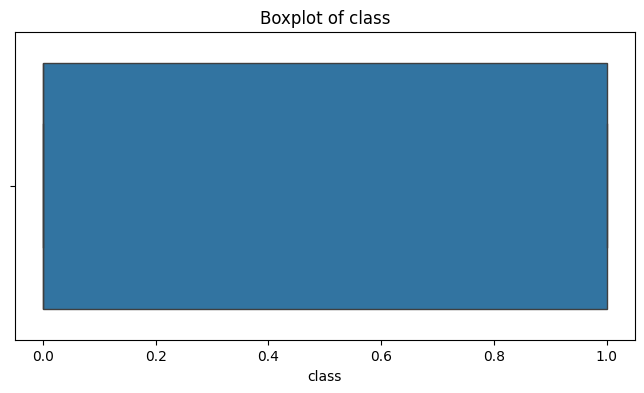

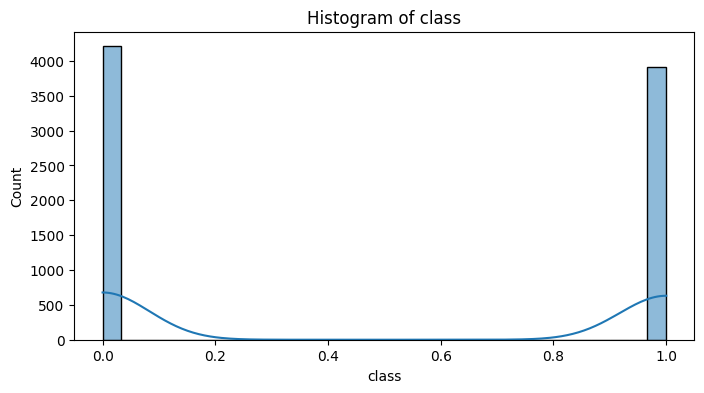

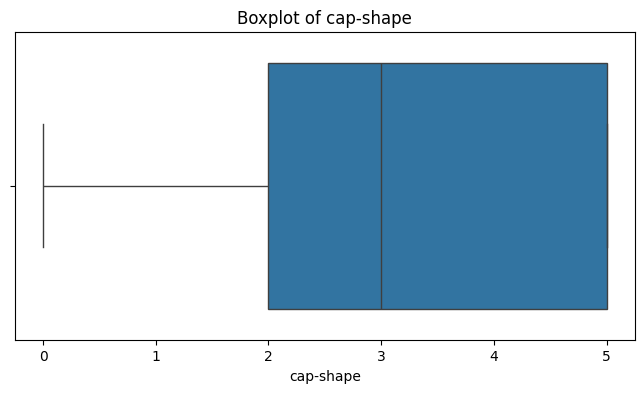

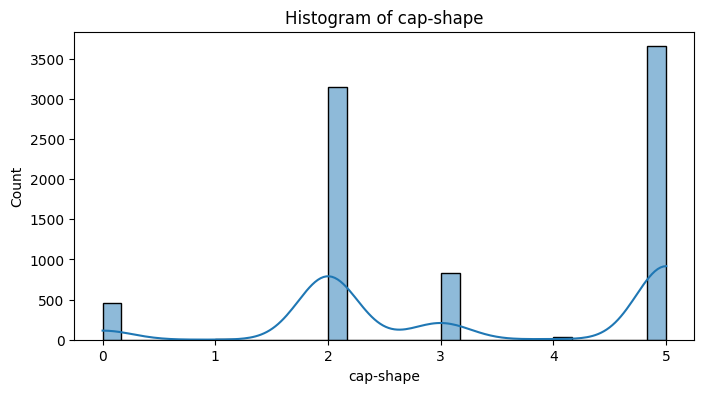

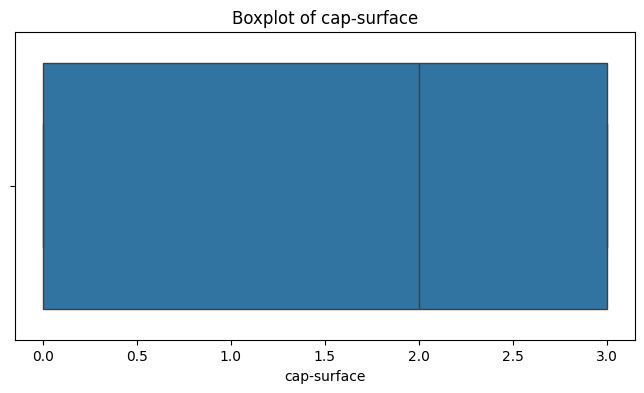

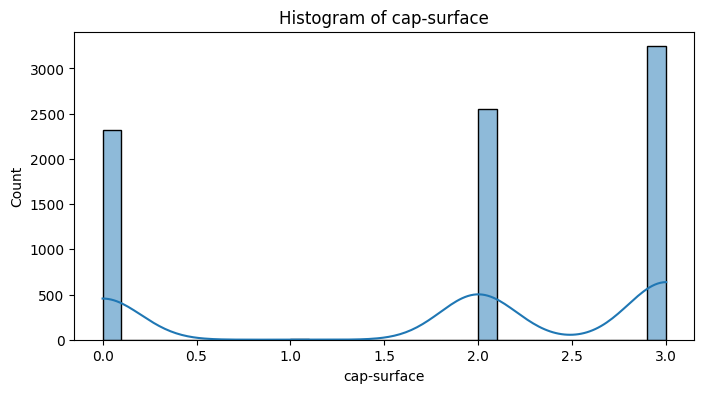

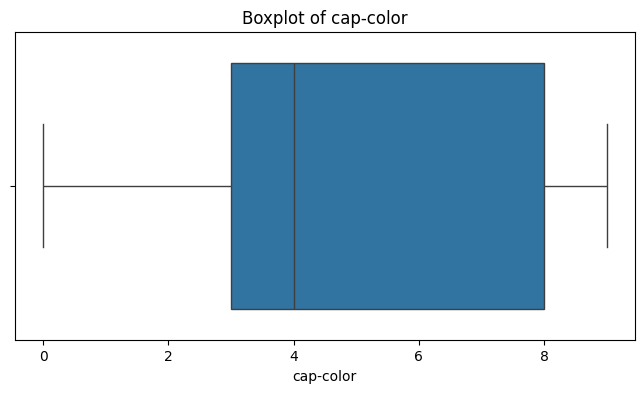

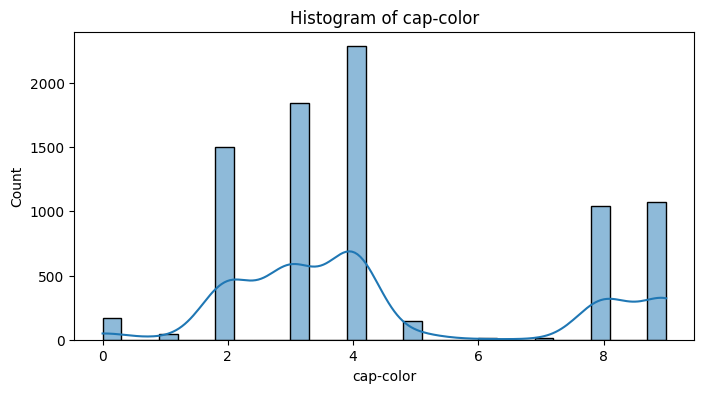

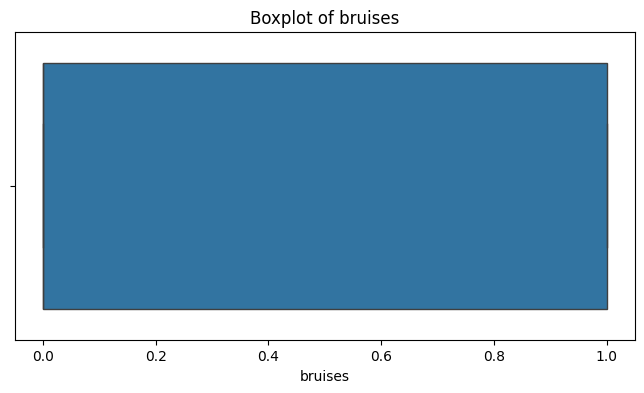

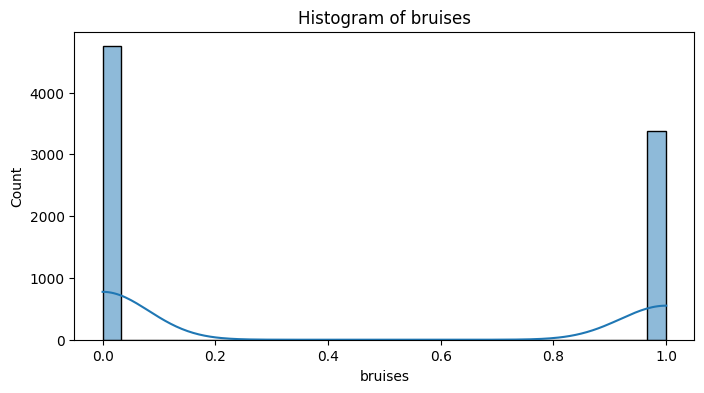

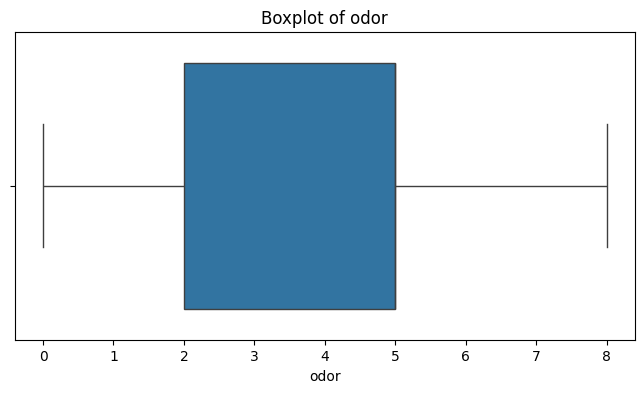

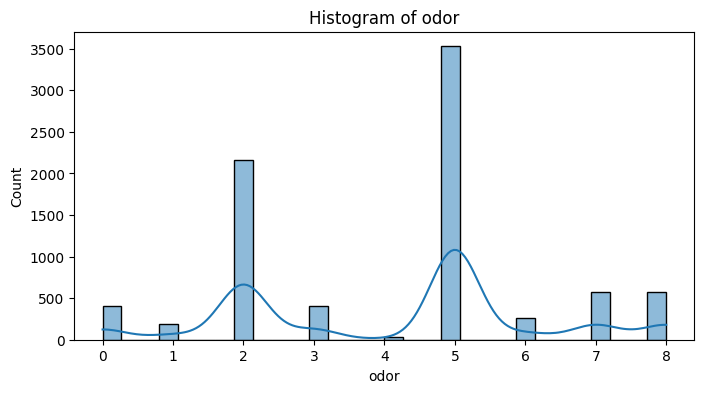

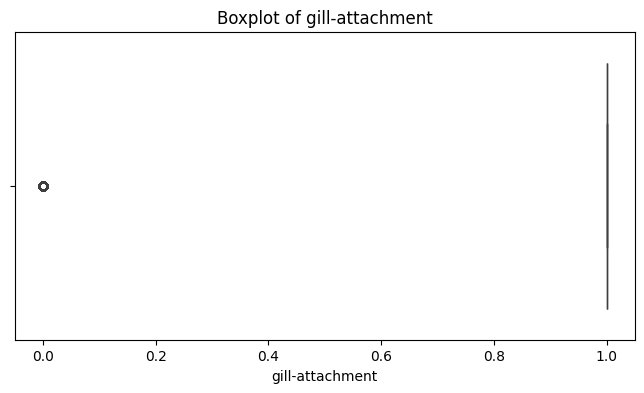

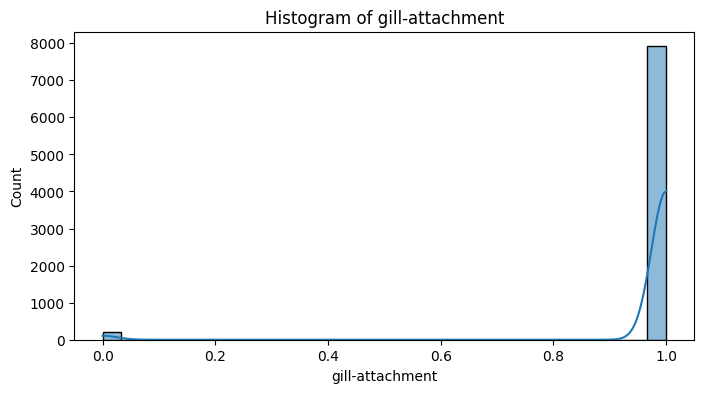

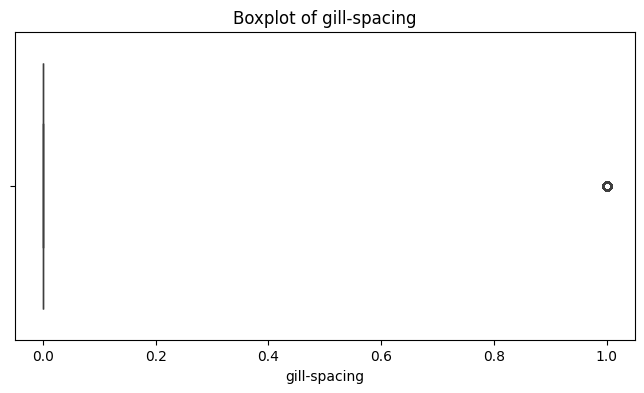

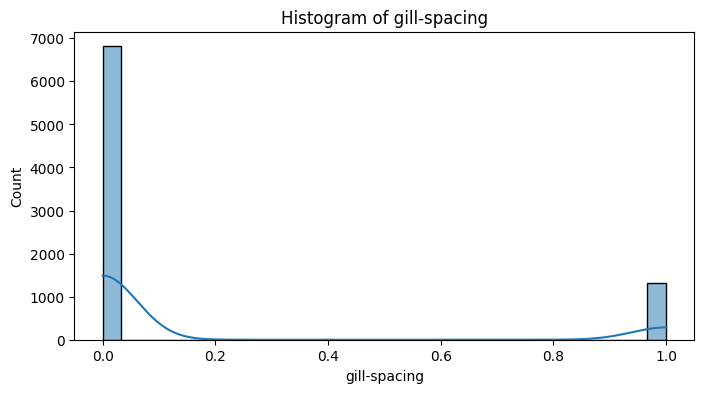

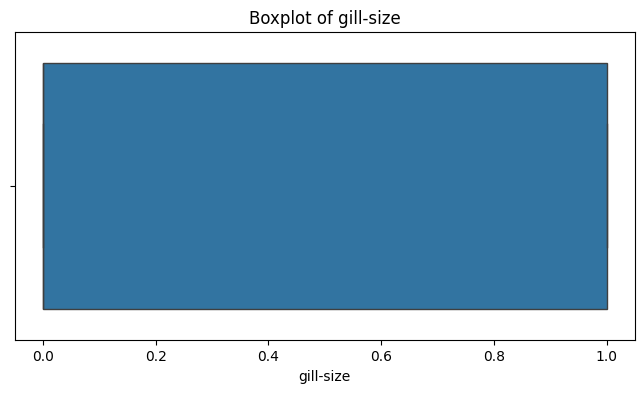

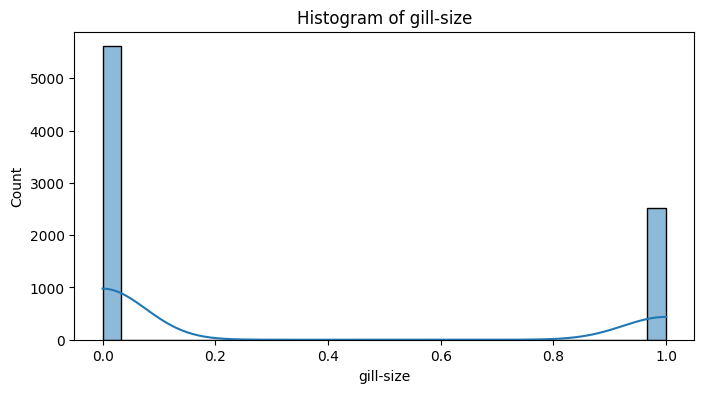

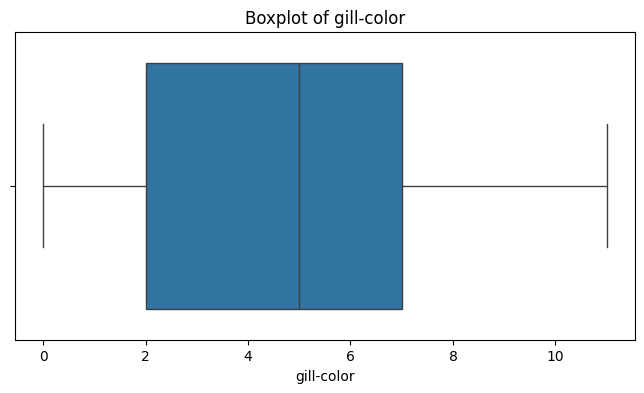

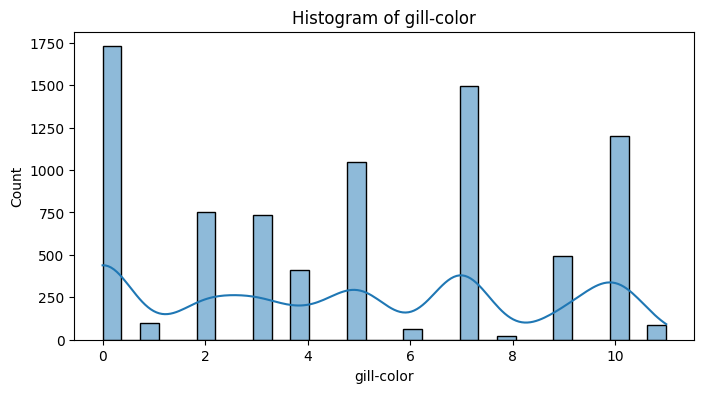

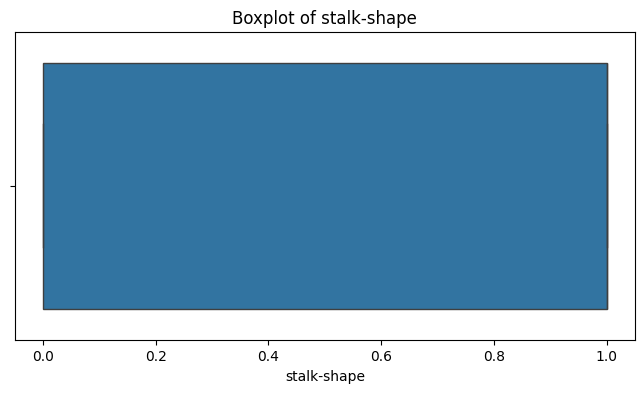

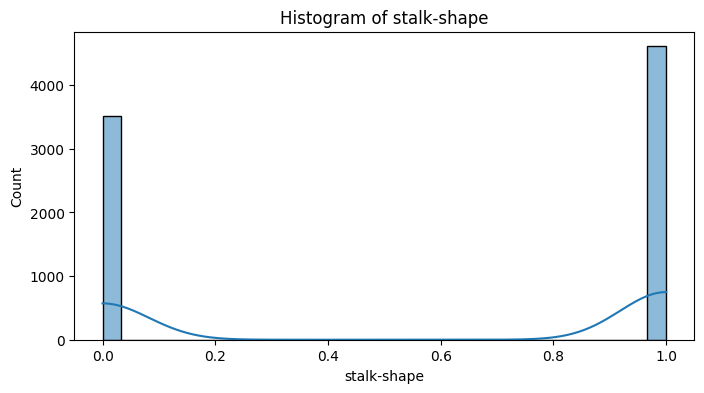

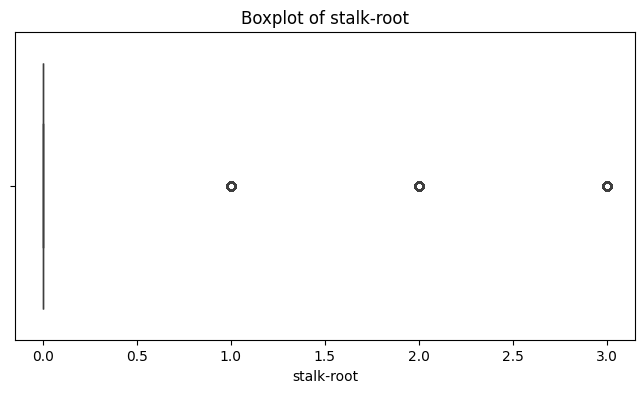

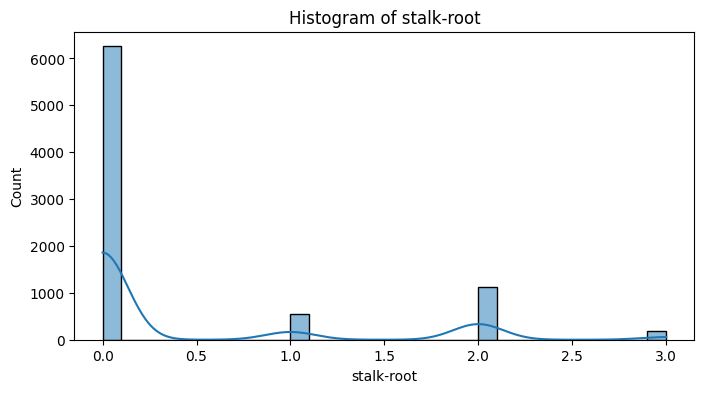

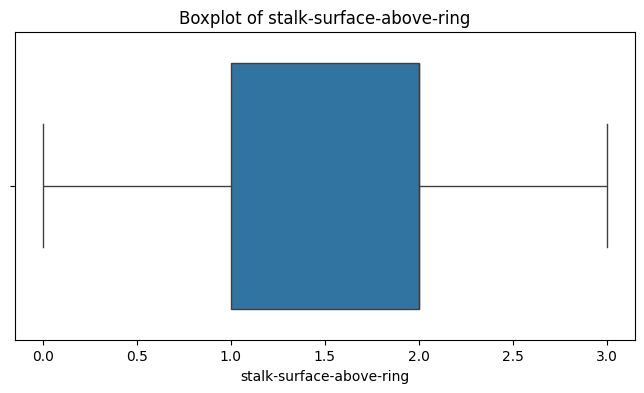

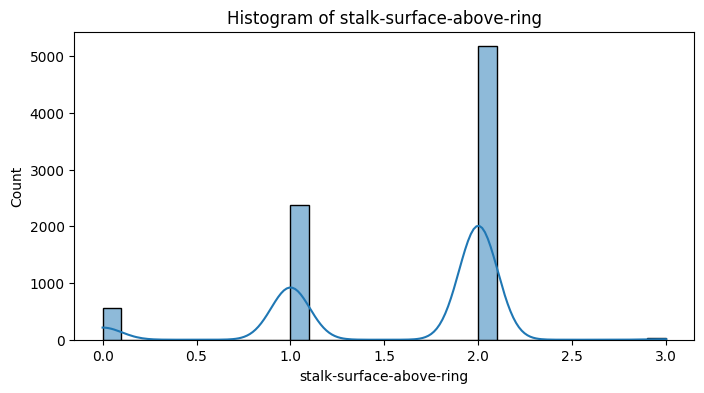

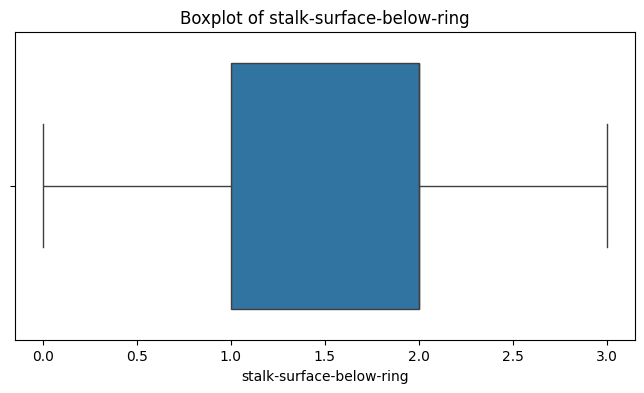

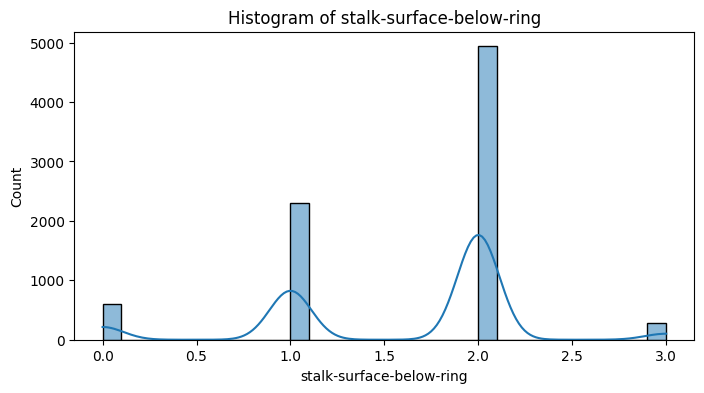

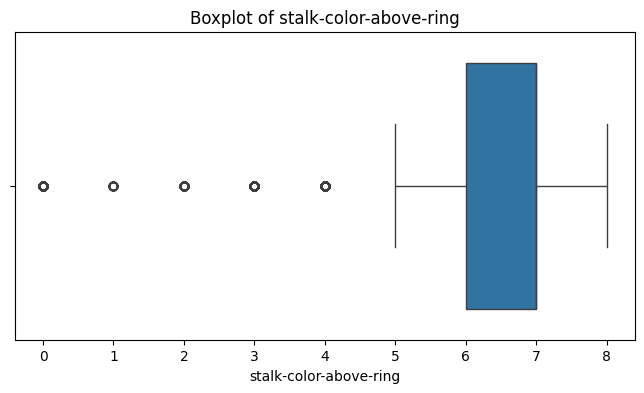

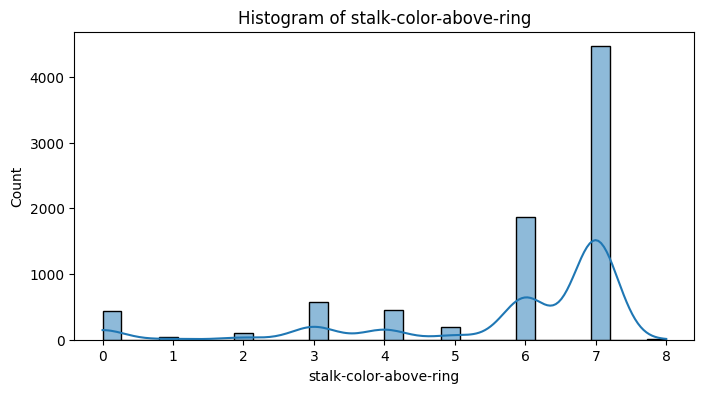

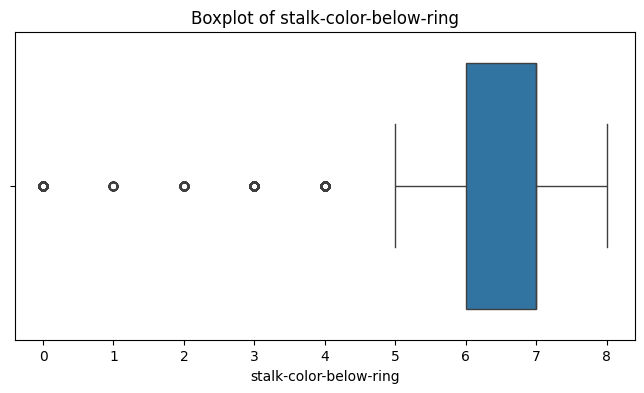

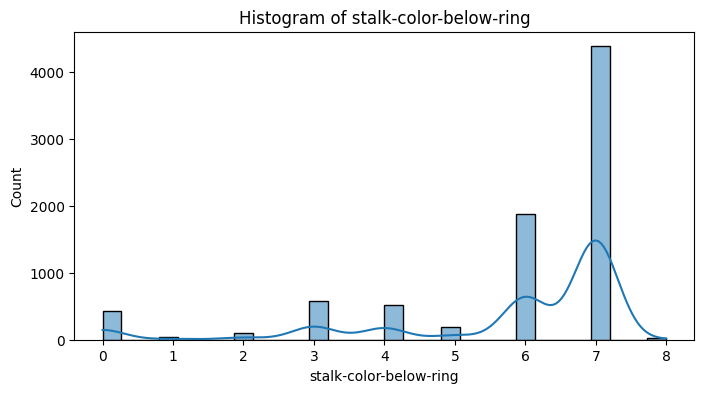

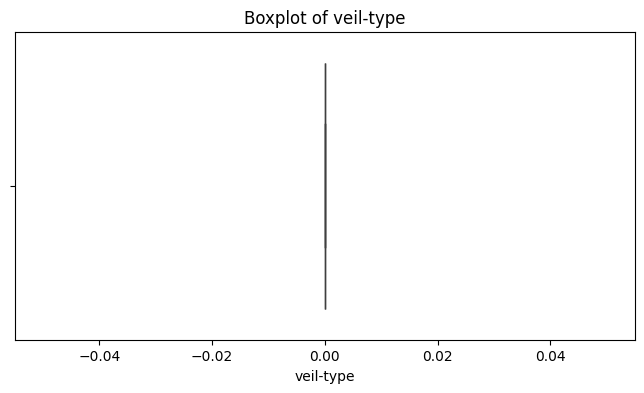

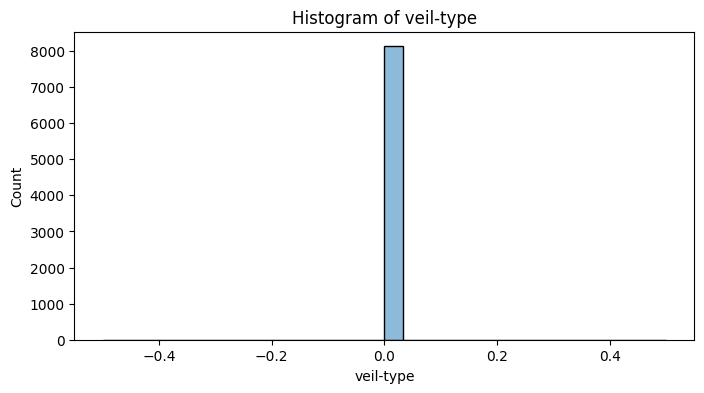

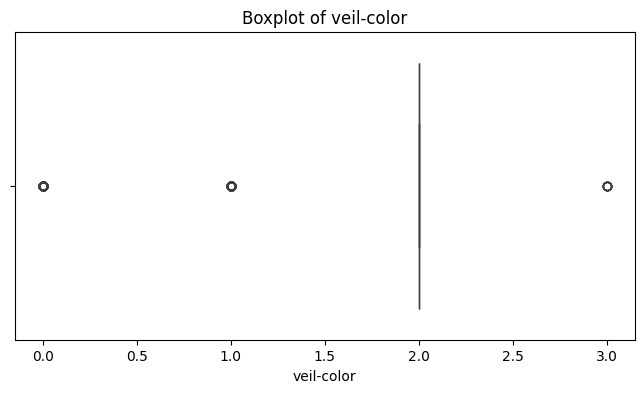

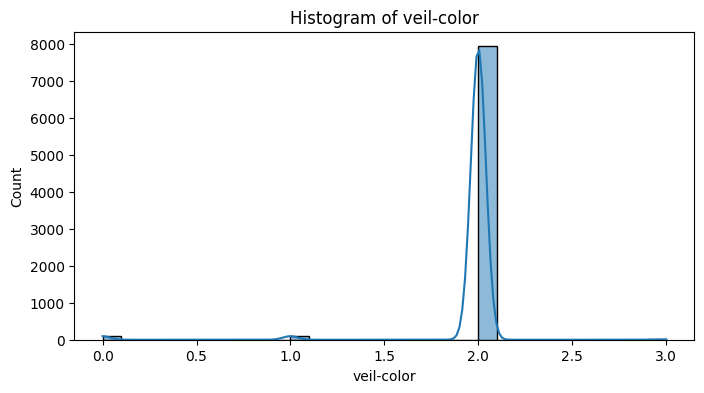

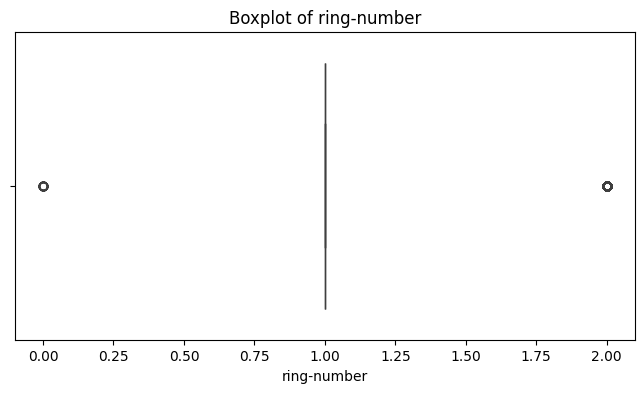

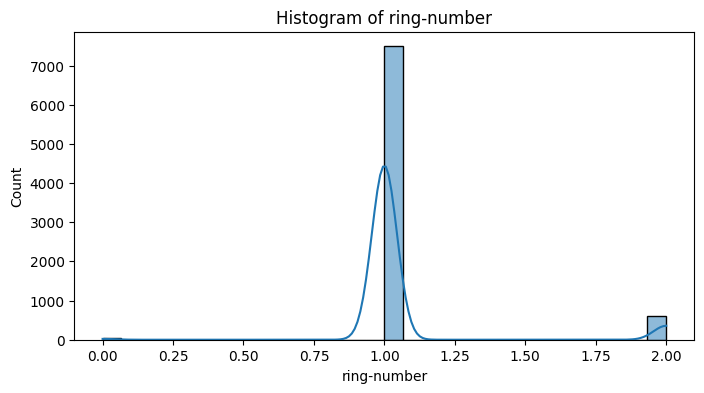

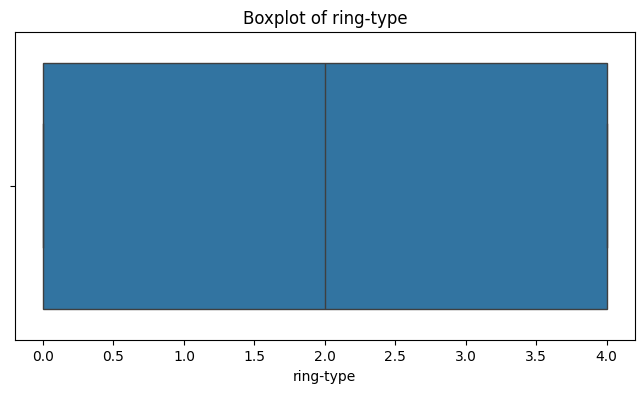

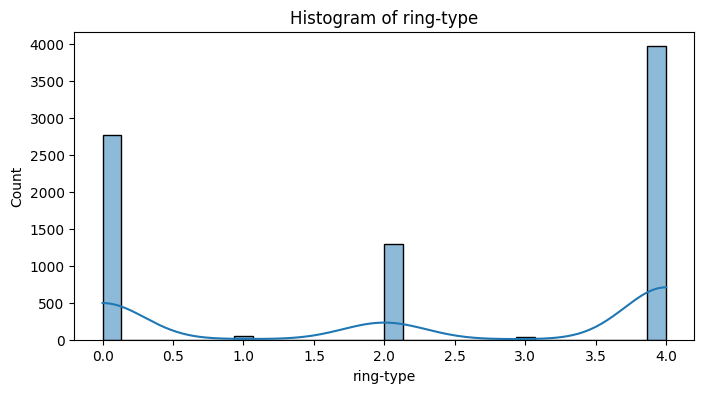

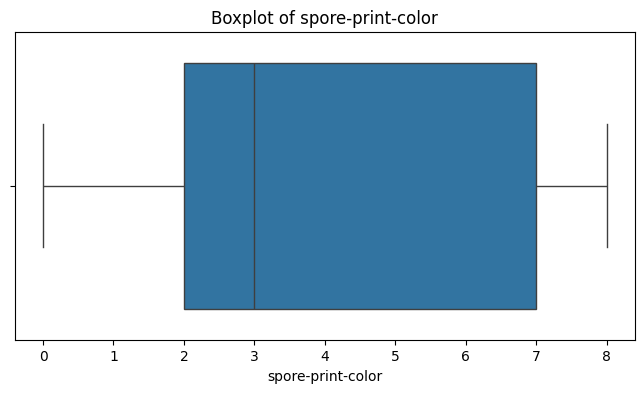

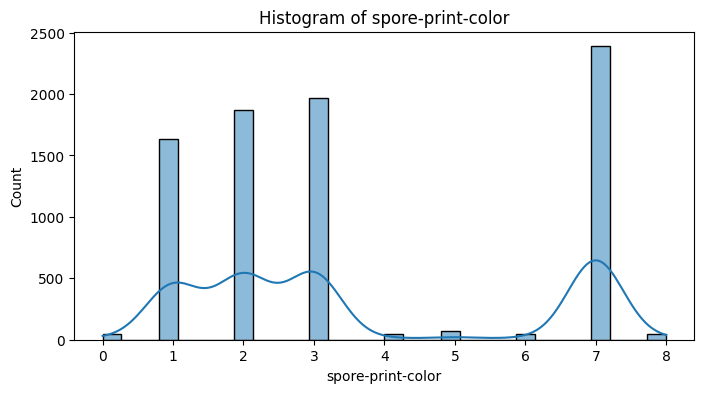

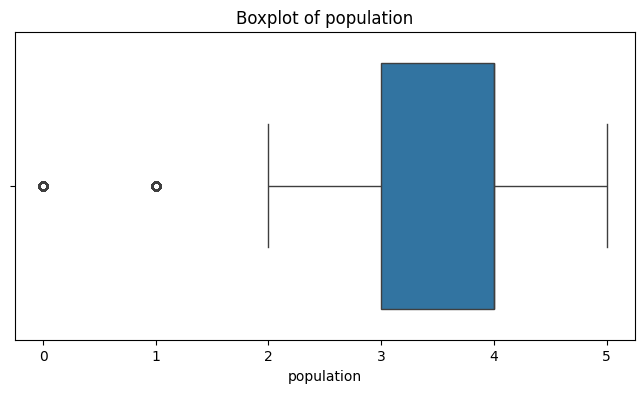

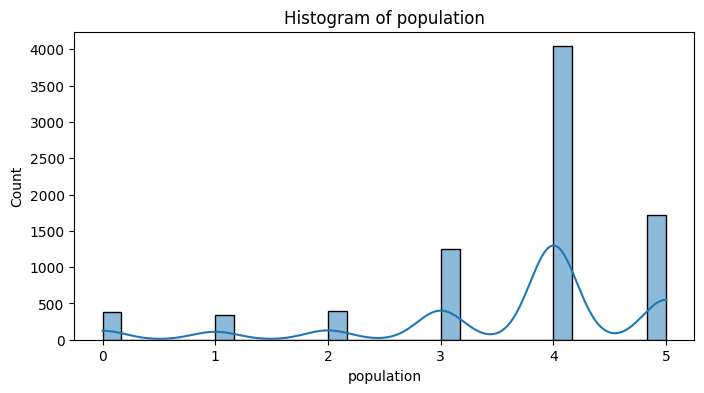

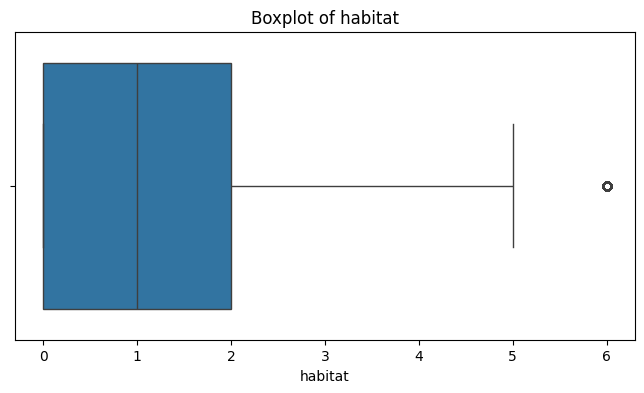

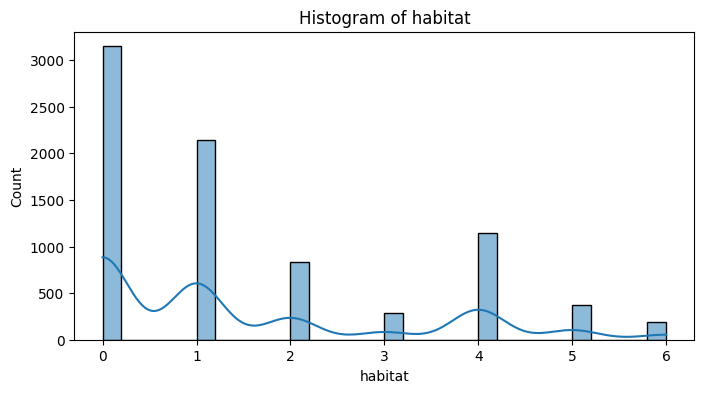

In [17]:
import seaborn as sns

for col in numeric_cols:
    plt.figure(figsize=(8,4))
    sns.boxplot(x=data[col])
    plt.title(f'Boxplot of {col}')
    plt.show()

    plt.figure(figsize=(8,4))
    sns.histplot(data[col], bins=30, kde=True)
    plt.title(f'Histogram of {col}')
    plt.show()

In [18]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

In [19]:
def evaluate_model(model, X_train, X_test, y_train, y_test):
    # Train the model
    model.fit(X_train, y_train)

    # Predict on test data
    y_pred = model.predict(X_test)

    # Compute metrics
    acc = accuracy_score(y_test, y_pred)
    prec = precision_score(y_test, y_pred, average='binary')  # binary classification
    rec = recall_score(y_test, y_pred, average='binary')
    f1 = f1_score(y_test, y_pred, average='binary')

    return acc, prec, rec, f1

In [20]:
models = {
    "Decision Tree": DecisionTreeClassifier(random_state=42),
    "Random Forest": RandomForestClassifier(random_state=42),
    "Naive Bayes": GaussianNB(),
    "SVM": SVC(random_state=42),
    "KNN": KNeighborsClassifier()
}

In [21]:
results = []

for name, model in models.items():
    acc, prec, rec, f1 = evaluate_model(model, X_train, X_test, y_train, y_test)
    results.append({
        "Model": name,
        "Accuracy": acc,
        "Precision": prec,
        "Recall": rec,
        "F1-Score": f1
    })

results_df = pd.DataFrame(results)
print("\nModel Performance Summary:")
print(results_df)


Model Performance Summary:
           Model  Accuracy  Precision    Recall  F1-Score
0  Decision Tree  1.000000   1.000000  1.000000  1.000000
1  Random Forest  1.000000   1.000000  1.000000  1.000000
2    Naive Bayes  0.892923   0.878261  0.902937  0.890428
3            SVM  0.992000   0.997416  0.985951  0.991651
4            KNN  0.996923   0.994911  0.998723  0.996813


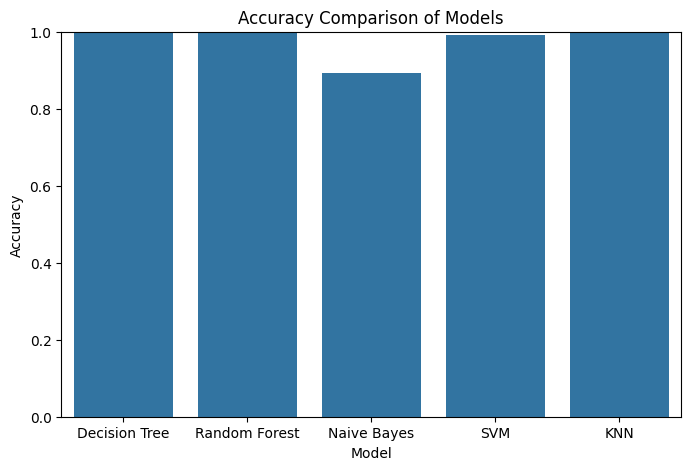

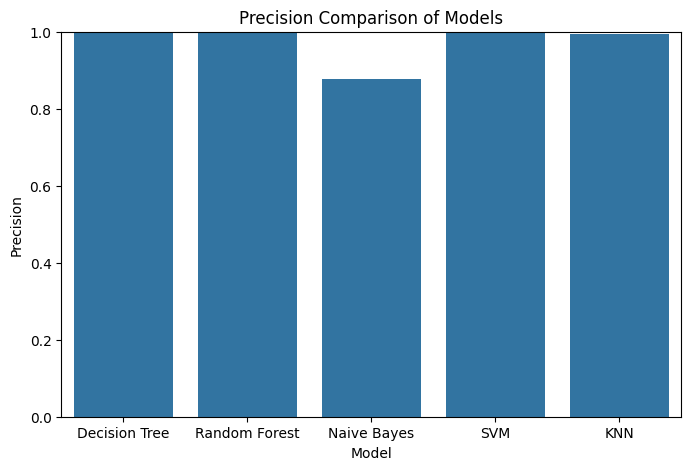

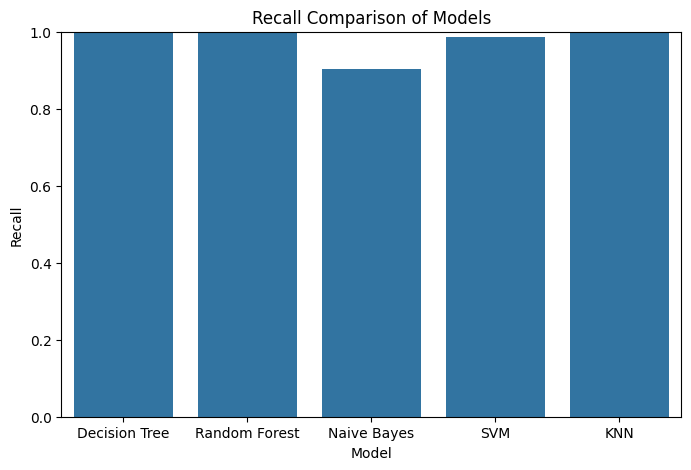

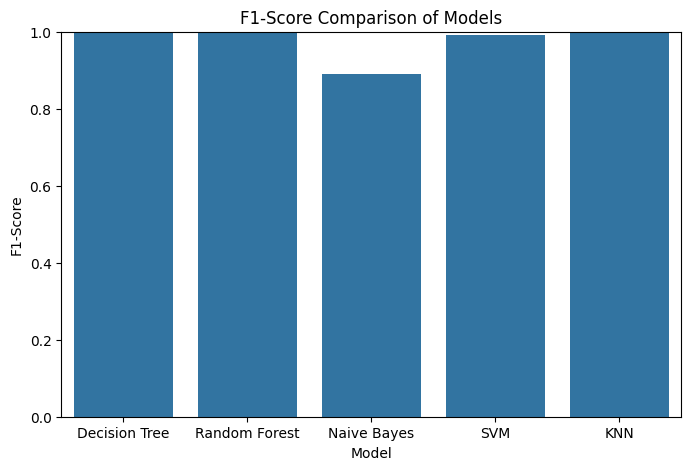

In [22]:
metrics = ["Accuracy", "Precision", "Recall", "F1-Score"]

# Loop through each metric and create a bar plot
for metric in metrics:
    plt.figure(figsize=(8,5))
    sns.barplot(x="Model", y=metric, data=results_df)
    plt.title(f"{metric} Comparison of Models")
    plt.ylim(0,1)  # scale 0-1 for consistency
    plt.show()


In [23]:
best_models = results_df[results_df['F1-Score'] == results_df['F1-Score'].max()]
print("Best Performing Models:")
print(best_models)

Best Performing Models:
           Model  Accuracy  Precision  Recall  F1-Score
0  Decision Tree       1.0        1.0     1.0       1.0
1  Random Forest       1.0        1.0     1.0       1.0
